# Import dataset

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [84]:
df.isna().sum()[df.isna().sum()>0]

SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
IkutProgramLOP                        258
AlasanResign                           66
dtype: int64

In [61]:
list_item = []
for col in df.columns:
    dattype = df[col].dtype
    n_null =  df[col].isna().sum()
    percent_null = round(100*df[col].isna().sum()/len(df[col]),2)
    n_unique = df[col].nunique()
    uniq = df[col].unique()[:5]
    list_item.append([col,dattype, n_null,percent_null,n_unique,uniq] )
desc_df = pd.DataFrame(data=list_item, columns='feature data_type n_null percent_null unique_num uniq'.split())
desc_df

,feature,data_type,n_null,percent_null,unique_num,uniq
0,Username,object,0,0.00,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.00,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.00,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.00,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.00,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.00,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [63]:
df.duplicated().sum()

0

**Observations**

* Dataset consist of 287 rows and 25 columns
* `Username` are unique id values and not relevant to modelling will dropped.
* Replace value `-` and will be changed to null.
* Feature `PernahBekerja` with 2 values but same intension will be dropped.
* Features  `Email`, and `NomorHP` considered unnecessary will be dropped
* `IkutProgramLOP` have over 80% null values will be dropped
* `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `JumlahKetidakhadiran`, and `AlasanResign` have null values below 25%, so it will have imputation
* Some features will require changing the data type

# Data Preprocessing

In [64]:
#Drop columns
df = df.drop(columns=['Username','PernahBekerja','Email','NomorHP','IkutProgramLOP'])

In [65]:
df.head()

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


## Missing Values

In [66]:
df = df.replace('-',np.nan)

In [67]:
list_item = []
for col in df.columns:
    dattype = df[col].dtype
    n_null =  df[col].isna().sum()
    percent_null = round(100*df[col].isna().sum()/len(df[col]),2)
    n_unique = df[col].nunique()
    uniq = df[col].unique()[:5]
    list_item.append([col,dattype, n_null,percent_null,n_unique,uniq] )
desc_df = pd.DataFrame(data=list_item, columns='feature data_type n_null percent_null unique_num uniq'.split())
desc_df

,feature,data_type,n_null,percent_null,unique_num,uniq
0,EnterpriseID,int64,0,0.00,287,"[111065, 106080, 106452, 106325, 111171]"
1,StatusPernikahan,object,3,1.05,4,"[Belum_menikah, Menikah, Bercerai, Lainnya, nan]"
2,JenisKelamin,object,0,0.00,2,"[Pria, Wanita]"
3,StatusKepegawaian,object,0,0.00,3,"[Outsource, FullTime, Internship]"
4,Pekerjaan,object,0,0.00,14,"[Software Engineer (Back End), Data Analyst, S..."
5,JenjangKarir,object,0,0.00,3,"[Freshgraduate_program, Senior_level, Mid_level]"
6,PerformancePegawai,object,0,0.00,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
7,AsalDaerah,object,0,0.00,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
8,HiringPlatform,object,0,0.00,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."
9,SkorSurveyEngagement,int64,0,0.00,5,"[4, 3, 2, 1, 5]"


In [68]:
#fillna with median and mode
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)
df['StatusPernikahan'].fillna(df['StatusPernikahan'].mode()[0], inplace=True)

In [69]:
today = datetime.date.today()
df['TanggalResign'].fillna(today.strftime('%Y-%m-%d'), inplace=True) 

## Convert datatype

In [70]:
df['SkorKepuasanPegawai'] =  df['SkorKepuasanPegawai'].astype('int64')
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].astype('int64')
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].astype('int64')
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].astype('int64')
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

# Feature engineering

In [71]:
# Age
df['Umur'] = int(today.strftime('%Y')) - df['TanggalLahir'].dt.year

# Year Hiring
df['YearHiring'] = df['TanggalHiring'].dt.year

# Year Resign
df['YearResign'] = df['TanggalResign'].dt.year 
df['YearResign'] = df['YearResign'].replace(2023,'Tidak Resign')

# Work Duration
df['MasaKerja'] = df['TanggalResign'].dt.year - df['TanggalHiring'].dt.year
df["MasaKerja"] = df["MasaKerja"].map(lambda x: 0 if x < 0 else x)
#Resign Status
df['is_resign'] = np.where(df['YearResign']=='Tidak Resign',0,1)

In [72]:
df.head()

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,...,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Umur,YearHiring,YearResign,MasaKerja,is_resign
0,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,...,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,2023-08-06,51,2011,Tidak Resign,12,0
1,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,...,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,39,2014,2018,4,1
2,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,...,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,49,2011,2014,3,1
3,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,...,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,2023-08-06,44,2014,Tidak Resign,9,0
4,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,...,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,49,2013,2018,5,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   EnterpriseID                        287 non-null    int64         
 1   StatusPernikahan                    287 non-null    object        
 2   JenisKelamin                        287 non-null    object        
 3   StatusKepegawaian                   287 non-null    object        
 4   Pekerjaan                           287 non-null    object        
 5   JenjangKarir                        287 non-null    object        
 6   PerformancePegawai                  287 non-null    object        
 7   AsalDaerah                          287 non-null    object        
 8   HiringPlatform                      287 non-null    object        
 9   SkorSurveyEngagement                287 non-null    int64         
 10  SkorKepuasanPegawai       

# EDA

In [74]:
df['is_resign'].value_counts()

0    198
1     89
Name: is_resign, dtype: int64

In [75]:
cat = [i for i in df.columns if df[i].dtype == 'O']
num = [i for i in df.columns if df[i].dtype in ['int64','int32']]
num

['EnterpriseID',
 'SkorSurveyEngagement',
 'SkorKepuasanPegawai',
 'JumlahKeikutsertaanProjek',
 'JumlahKeterlambatanSebulanTerakhir',
 'JumlahKetidakhadiran',
 'Umur',
 'YearHiring',
 'MasaKerja',
 'is_resign']

## Univariate Analysis

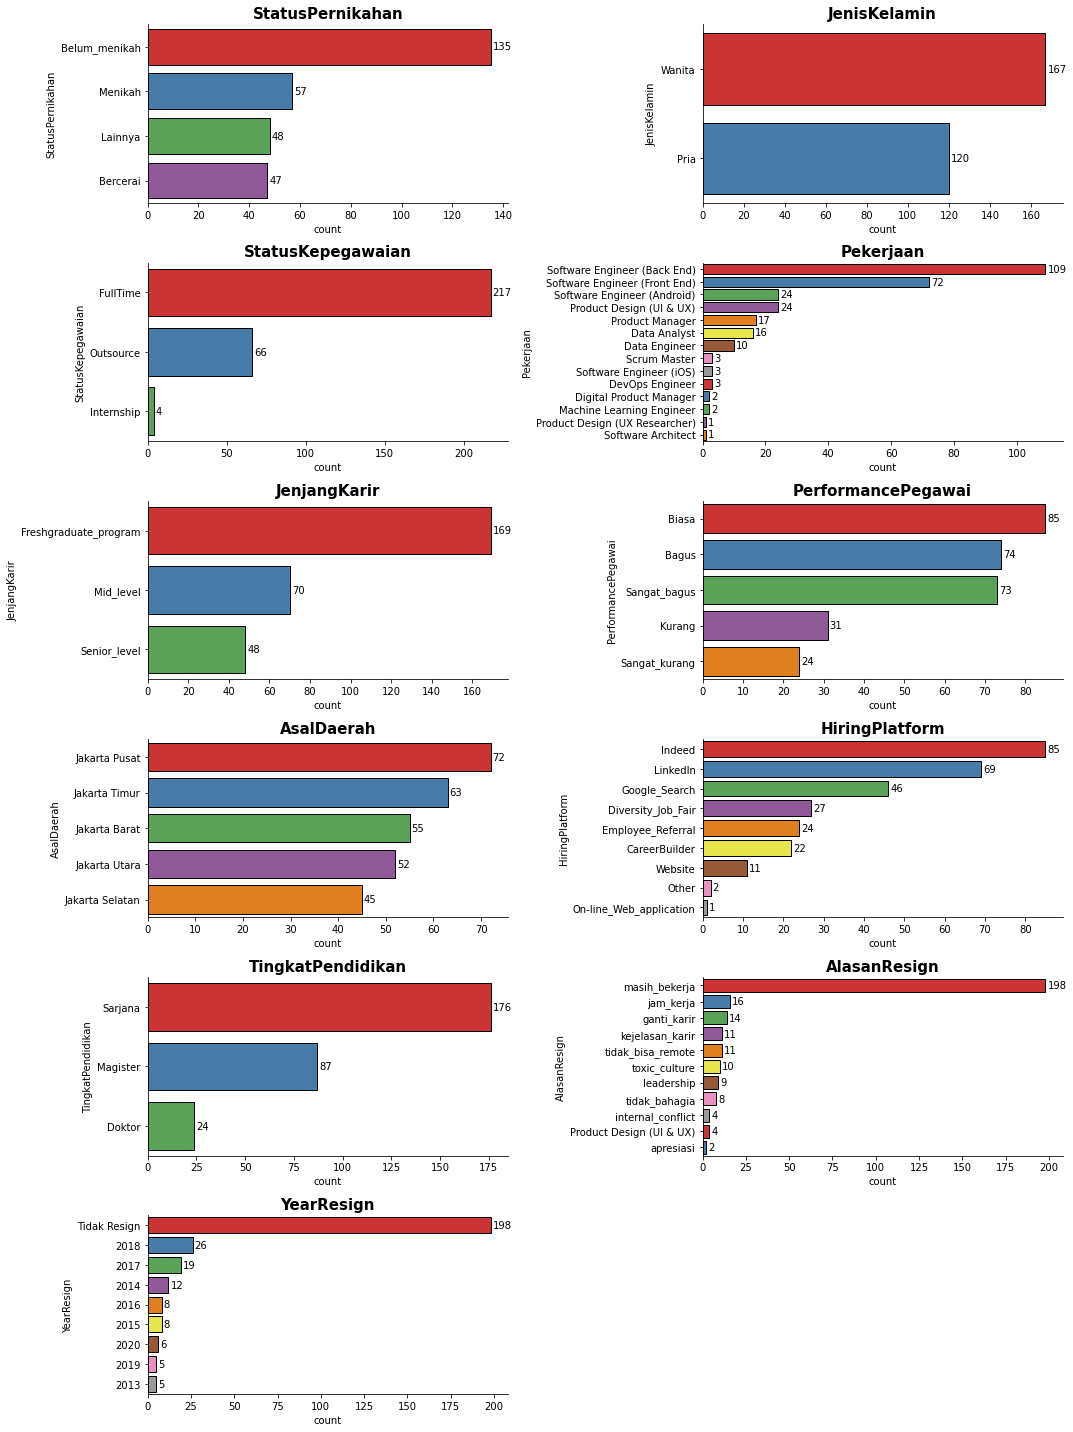

In [76]:
plt.figure(figsize=(15,20))
for i in range(len(cat)):
    plt.subplot(6,2, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='Set1', order=df[cat[i]].value_counts().index,edgecolor='black')
    plt.bar_label(ax.containers[0], padding=2)
    ax.set_title(cat[i], fontsize=15, color='black', weight='bold')
sns.despine()
plt.tight_layout()
plt.show()

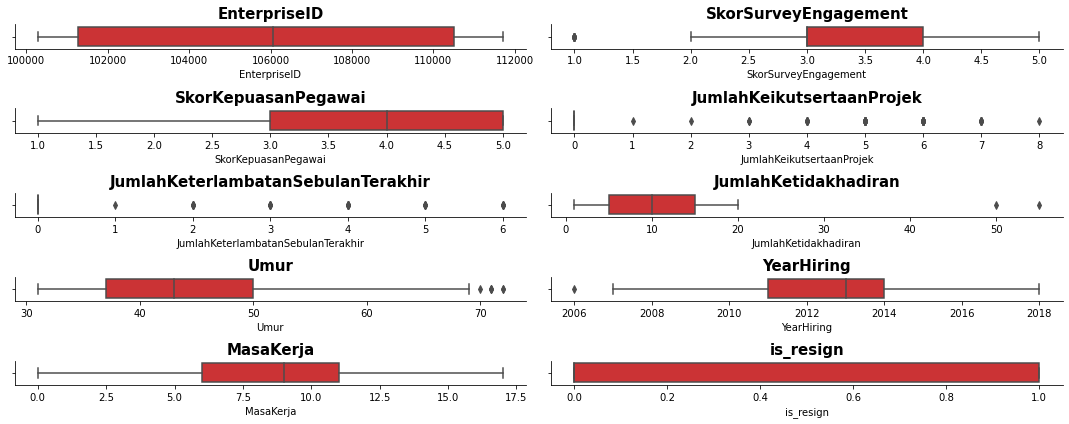

In [77]:
plt.figure(figsize=(15,6))
for i in range(len(num)):
    plt.subplot(5,2, i+1)
    ax = sns.boxplot(x=num[i], data=df, palette='Set1')
    ax.set_title(num[i], fontsize=15, color='black', weight='bold')
    # plt.bar_label(ax.containers[0], padding=2)
    # plt.bar_label(ax.containers[1], padding=2)
sns.despine()
plt.tight_layout()
plt.show()

## Multivariate Analysis

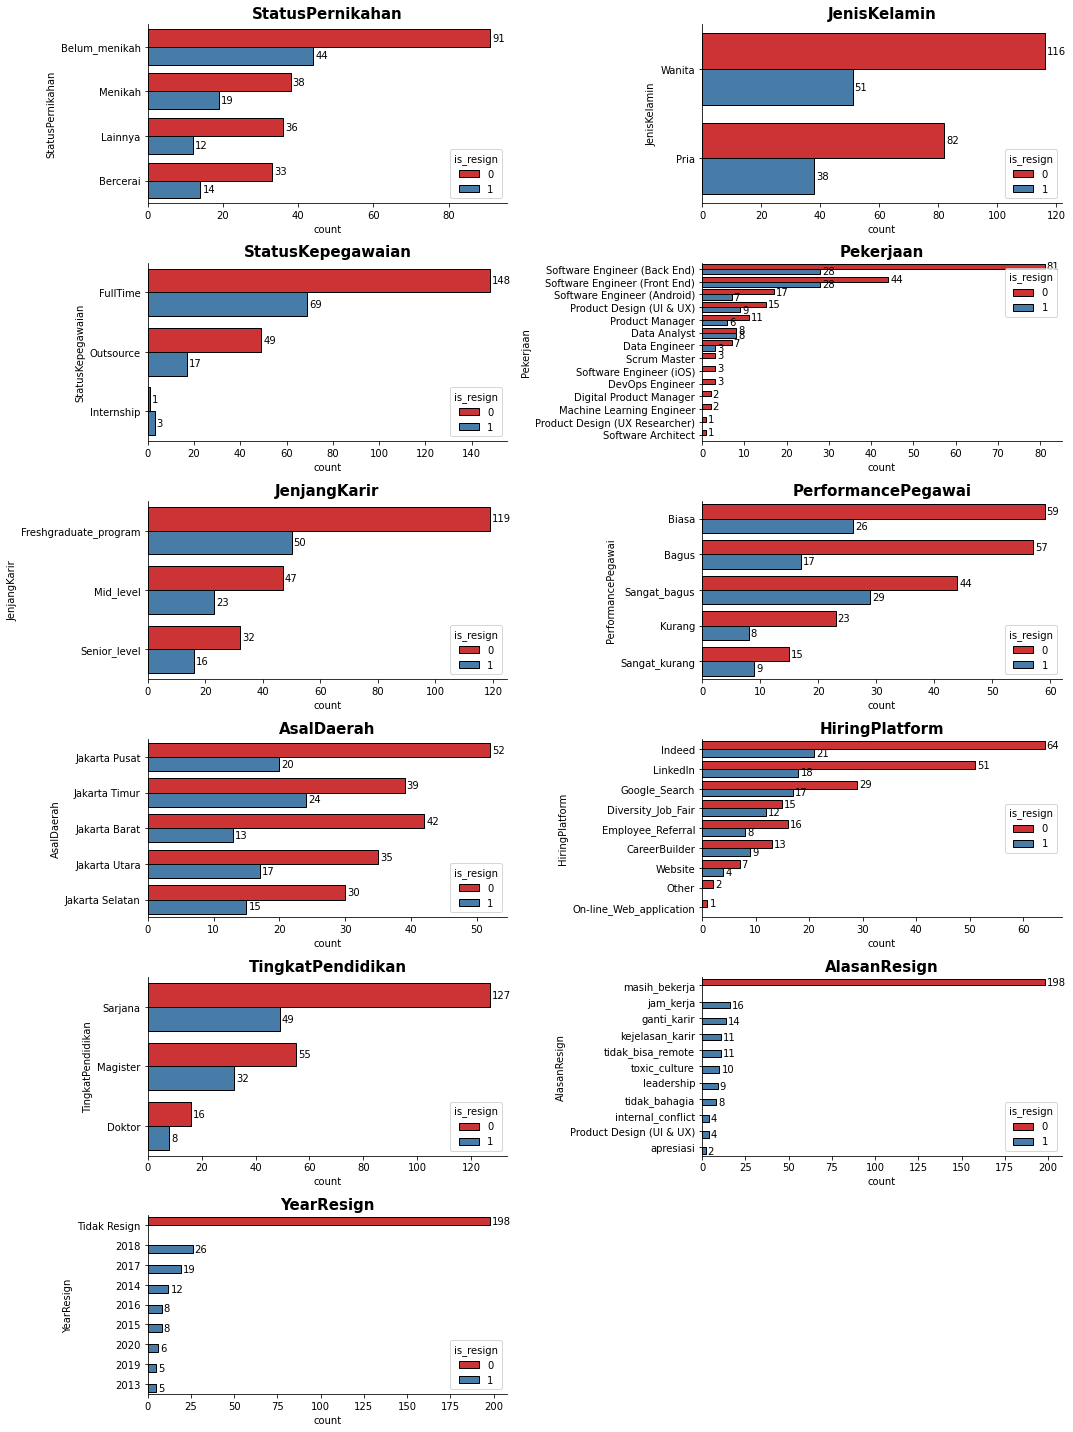

In [78]:
plt.figure(figsize=(15,20))
for i in range(len(cat)):
    plt.subplot(6,2, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='Set1', order=df[cat[i]].value_counts().index,edgecolor='black',hue='is_resign')
    plt.bar_label(ax.containers[0], padding=2)
    plt.bar_label(ax.containers[1], padding=2)
    ax.set_title(cat[i], fontsize=15, color='black', weight='bold')
sns.despine()
plt.tight_layout()
plt.show()

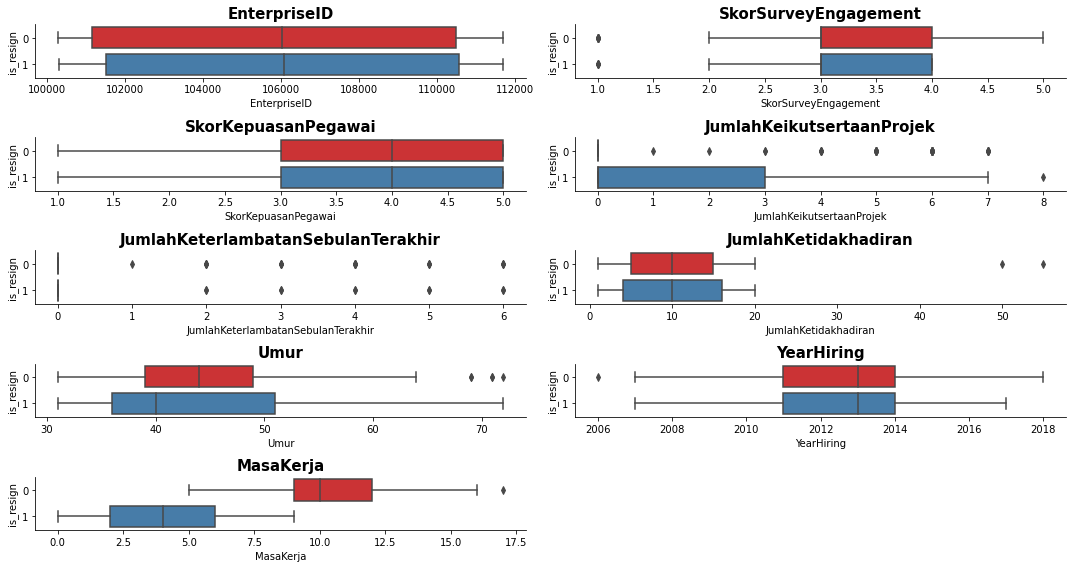

In [79]:
df_ = df.copy()
df_['is_resign'] = df_['is_resign'].astype('category')
plt.figure(figsize=(15,8))
for i in range(len(num[:-1])):
    plt.subplot(5,2, i+1)
    ax = sns.boxplot(x=num[i], data=df_, palette='Set1',y='is_resign')
    ax.set_title(num[i], fontsize=15, color='black', weight='bold')
    # plt.bar_label(ax.containers[0], padding=2)
    # plt.bar_label(ax.containers[1], padding=2)
sns.despine()
plt.tight_layout()
plt.show()

In [80]:
hire = df.groupby('YearHiring')['EnterpriseID'].count().reset_index()
hire.columns = ['Year','Hire']
res = df.groupby('YearResign')['EnterpriseID'].count().reset_index()
res.columns = ['Year','Resign']
hire_res = hire.merge(res,on='Year',how='outer')
hire_res = hire_res.iloc[:-1]

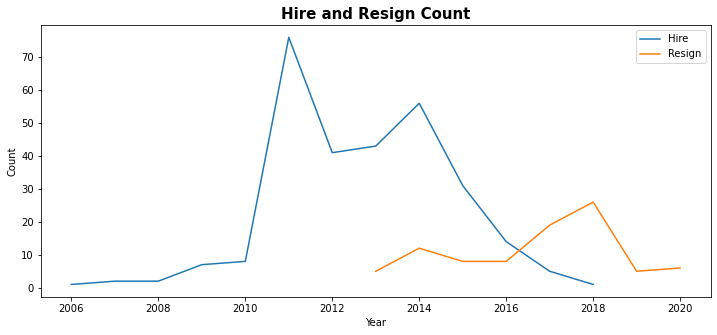

In [81]:
plt.figure(figsize=(12,5))
sns.lineplot(data=hire_res,x='Year',y='Hire',label='Hire')
sns.lineplot(data=hire_res,x='Year',y='Resign',label='Resign')
plt.title('Hire and Resign Count',fontsize=15, color='black', weight='bold')
plt.ylabel('Count')
plt.show()